In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [101]:
data = pd.read_csv('/content/drive/MyDrive/flood_final/nilwala_flood_random_floodoccurred.csv')

In [102]:
data.head(5)

,Date,Rainfall_mm,UpperCatchmentLevel_m,RiverLevel_m,SoilSaturationPercent,FloodOccurred
0,2024-10-01,100.496714,4.821005,7.016989,74.778361,0
1,2024-10-02,71.861736,6.749819,2.807835,84.448814,1
2,2024-10-03,173.647689,7.067294,4.789606,91.181801,0
3,2024-10-04,93.523030,6.380370,4.995638,72.996626,0
4,2024-10-05,204.765847,6.119098,4.393435,71.829815,0


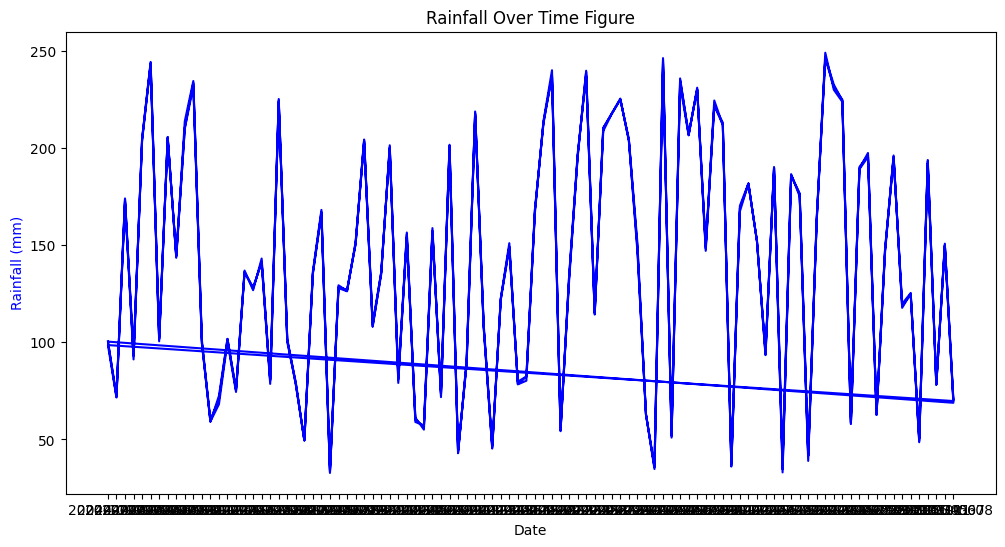

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Rainfall_mm'], color='blue')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)', color='blue')
plt.title('Rainfall Over Time Figure')
plt.show()

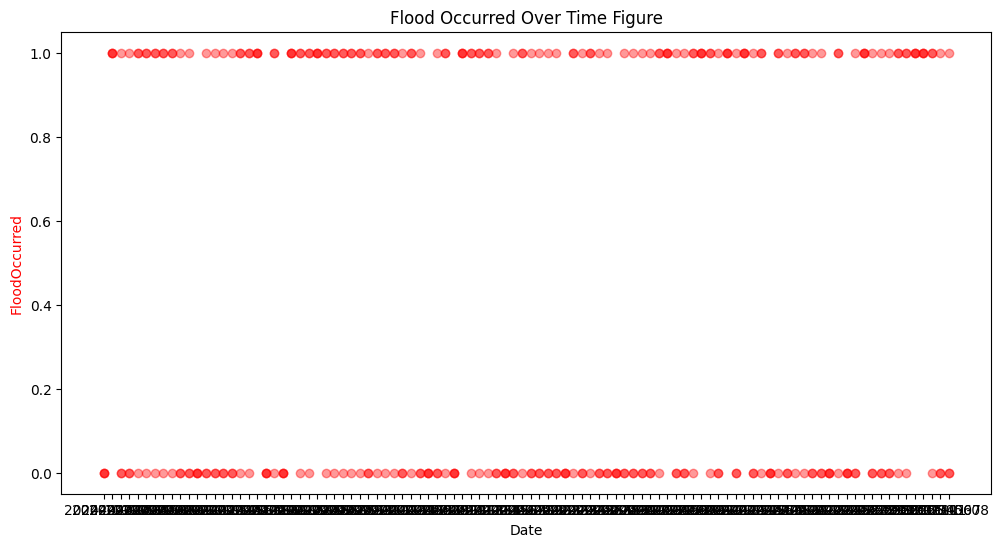

In [104]:
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['FloodOccurred'], color='red', alpha=0.4)
plt.xlabel('Date')
plt.ylabel('FloodOccurred', color='red')
plt.title('Flood Occurred Over Time Figure')
plt.show()

In [105]:
data = data.set_index(data['Date'])
data = data.drop('Date', axis=1)
data.head()

,Rainfall_mm,UpperCatchmentLevel_m,RiverLevel_m,SoilSaturationPercent,FloodOccurred
Date,,,,,
2024-10-01,100.496714,4.821005,7.016989,74.778361,0
2024-10-02,71.861736,6.749819,2.807835,84.448814,1
2024-10-03,173.647689,7.067294,4.789606,91.181801,0
2024-10-04,93.523030,6.380370,4.995638,72.996626,0
2024-10-05,204.765847,6.119098,4.393435,71.829815,0


In [106]:
x = data.drop('FloodOccurred', axis=1)
y = data['FloodOccurred']

In [107]:
x.shape

(300, 4)

In [108]:
y.shape

(300,)

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [110]:
x_train.shape

(240, 4)

In [111]:
y_test.shape

(60,)

In [134]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [135]:
y_predict = model.predict(x_test)
y_predict

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [136]:
Feature_DataFrame = x_test.copy()
predicted_Actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
predicted_DataFrame = pd.concat([Feature_DataFrame, predicted_Actual], axis=1)
predicted_DataFrame

,Rainfall_mm,UpperCatchmentLevel_m,RiverLevel_m,SoilSaturationPercent,Actual,Predicted
Date,,,,,,
2024-10-04,93.053802,6.332969,3.177725,74.109700,0,1
2024-12-06,52.632411,6.361875,4.845865,56.170943,1,1
2024-11-22,237.319975,4.934274,3.074127,62.194384,0,0
2024-10-10,210.542560,5.277807,6.016044,59.477530,1,1
2024-11-03,200.348400,7.378984,3.442202,52.696820,1,0
2024-10-27,34.064280,4.992458,5.589572,72.464037,0,1
2025-01-05,192.116143,5.532754,4.050445,72.999669,1,1
2024-10-10,209.925554,5.994439,6.216456,57.747646,0,1
2024-10-06,243.765863,6.587327,5.736796,52.546772,1,1


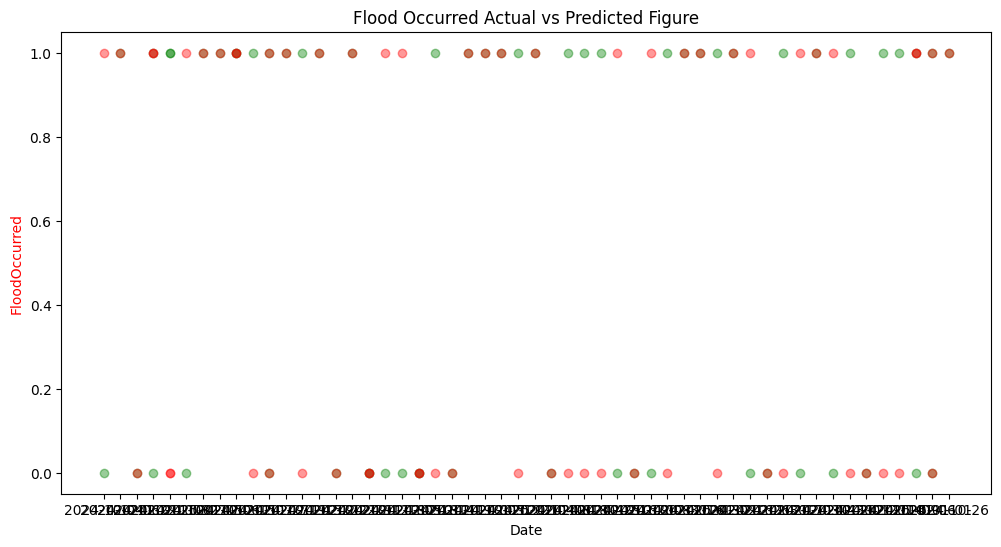

In [137]:
plt.figure(figsize=(12, 6))
plt.scatter(predicted_DataFrame.index, predicted_DataFrame['Actual'], color='green', alpha=0.4)
plt.scatter(predicted_DataFrame.index, predicted_DataFrame['Predicted'], color='red', alpha=0.4)
plt.xlabel('Date')
plt.ylabel('FloodOccurred', color='red')
plt.title('Flood Occurred Actual vs Predicted Figure')
plt.show()

In [138]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.46      0.54      0.50        24
           1       0.66      0.58      0.62        36

    accuracy                           0.57        60
   macro avg       0.56      0.56      0.56        60
weighted avg       0.58      0.57      0.57        60

